In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.5.3


### DataFrame 구조
- index(row) - coulmn(column) - data

In [3]:
num_list = [10,20,30,40,50]
pd. DataFrame(data=num_list)

,0
0,10
1,20
2,30
3,40
4,50


In [4]:
double_list = [[1000, '과자','2019-12-31','반품'],
 [2000, '음료', '2020-03-02', '정상'],
 [3000, '아이스크림', '2020-02-03','정상'],
 [1000,'과자','2019-12-31','반품']]
pd.DataFrame(data=double_list)

,0,1,2,3
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [5]:
double_columns = ['가격','종류','판매일자','반품여부']
df_salesdays = pd.DataFrame(data=double_list, columns=double_columns)
df_salesdays

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [6]:
df_salesdays.columns , type(df_salesdays.columns), list(df_salesdays.columns)

(Index(['가격', '종류', '판매일자', '반품여부'], dtype='object'),
 pandas.core.indexes.base.Index,
 ['가격', '종류', '판매일자', '반품여부'])

In [7]:
df_salesdays.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
df_salesdays.values

array([[1000, '과자', '2019-12-31', '반품'],
       [2000, '음료', '2020-03-02', '정상'],
       [3000, '아이스크림', '2020-02-03', '정상'],
       [1000, '과자', '2019-12-31', '반품']], dtype=object)

In [9]:
df_salesdays_dropcol = df_salesdays.drop(columns=['종류','판매일자',])
# df_salesdays.drop(columns=['종류','판매일자',],inplace=True) # 자체 지정한 df값이 변화한다

In [10]:
df_salesdays_dropcol

,가격,반품여부
0,1000,반품
1,2000,정상
2,3000,정상
3,1000,반품


In [11]:
## 필터 : and -&, or -|
# condition = (df_saledays_dropcol['반품여부'] == '정상')
condition = (df_salesdays_dropcol['가격'] >= 2500)
df_salesdays_dropcol.loc[condition]

,가격,반품여부
2,3000,정상


In [12]:
# (df_salesdays_dropcol['가격'] >= 2500) | (df_salesdays_dropcol['가격'] >= 1000)
(df_salesdays_dropcol['반품여부'] == '정상') & (df_salesdays_dropcol['가격'] >= 2500)

0    False
1    False
2     True
3    False
dtype: bool

In [13]:
## 요약
# df_salesdays_dropcol.pivot_table(index='반품여부', values ='가격')
# pd.pivot_table(data=df_salesdays_dropcol, index='반품여부', values ='가격')
import numpy as np
df_salesdays_dropcol.pivot_table(index='반품여부', values ='가격', aggfunc= 'min')

,가격
반품여부,
반품,1000
정상,2000


In [14]:
df_saledays.pivot_table(index=['반품여부', '종류'], values='가격', aggfunc=[np.sum, np.min, np.size])

NameError: name 'df_saledays' is not defined

In [15]:
df_saledays.info()

NameError: name 'df_saledays' is not defined

In [16]:
df_salesdays['가격'].mean()

1750.0

In [17]:
def mean_subtraction(cell_value) :
    result = 1750 - cell_value # 가격 평균 - 개별값
    return result

In [18]:
mean_subtraction(750)

1000

In [19]:
df_salesdays['가격'].apply(mean_subtraction)

0     750
1    -250
2   -1250
3     750
Name: 가격, dtype: int64

In [20]:
df_salesdays['가격차이'] = df_salesdays['가격'].apply(mean_subtraction) # 각 cell당 평균 차이값

In [21]:
df_salesdays

,가격,종류,판매일자,반품여부,가격차이
0,1000,과자,2019-12-31,반품,750
1,2000,음료,2020-03-02,정상,-250
2,3000,아이스크림,2020-02-03,정상,-1250
3,1000,과자,2019-12-31,반품,750


In [22]:
df_salesdaysdf_salesdays['가격'] + ['가격차이']

NameError: name 'df_salesdaysdf_salesdays' is not defined

### Series
- index - data

In [23]:
single_data = [0.1,0.2,0.3,0.4,0.5]
series_floats = pd.Series(data=single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [24]:
type(series_floats)

pandas.core.series.Series

### 통계 수치 표현

In [25]:
import numpy as np #numpy 숫지만 다룸 

In [26]:
arr = np.array([6, 4, 1, 3, 5, 3, 10, 7, 9])
arr

array([ 6,  4,  1,  3,  5,  3, 10,  7,  9])

In [27]:
# 평균, 합계
np.mean(arr), np.sum(arr)

(5.333333333333333, 48)

In [28]:
# 중앙값
np.median(arr)

5.0

In [29]:
# 최소값, 최대값
print(np.min(arr), np.max(arr))

1 10


In [30]:
# 분산, 표준편차
np.var(arr), np.std(arr)

(7.777777777777778, 2.788866755113585)

In [31]:
np.size(arr)

9

### IQR 

In [32]:
 # numpy : 다차원 배열과 행렬 연산을 지원하여 수치 계산 및 데이터 분석
 # IQR은 데이터의 중앙 50% 범위를 측정하므로 이상치(Outliers)를 식별하거나 데이터 분포의 특성을 이해하는 데 유용   
import numpy as np  
data = np.array([44, 32, 53, 75, 36, 45, 25, 49, 46, 28])

In [33]:
Q1 = np.percentile(data, 25)

In [34]:
Q3 = np.percentile(data, 75)

In [35]:
Q3 - Q1

15.25

In [36]:
Q1, Q3

(33.0, 48.25)

In [37]:

Q1,Q3, Q3-Q1, np.median(data)

(33.0, 48.25, 15.25, 44.5)

In [38]:
import seaborn as sns

<Axes: >

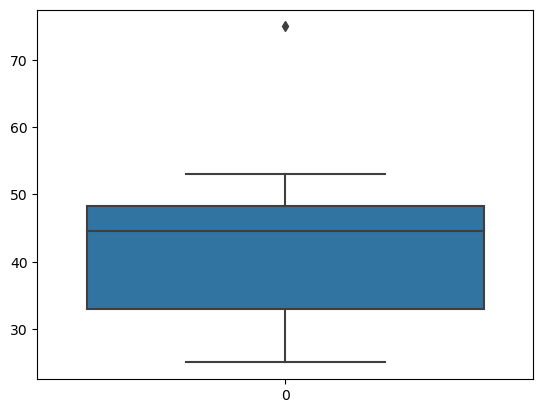

In [39]:
sns.boxplot(data)

### np.argmax

In [42]:
## values = [1.2, 3.4, 5.6, 0.9, 0.6]
values = [0.16857425, 0.66320011, 0.16822564]
import numpy as np
np.argmax(values) # 가장 큰 값에 인덱스 리턴

1